In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in
#Rows = 5043
mmdf = pd.read_csv(r'C:\Users\angel\Desktop\movie_metadata.csv')

In [4]:
mmdf = mmdf.drop(columns = ['director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'movie_facebook_likes'], axis = 1)
#dropped all facebook like columns (director, actors 1-3, cast_total, movie_facebook_likes) because of multiple columns displaying values of 0
mmdf

,color,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,...,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio
0,Color,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,...,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,1.78
1,Color,Gore Verbinski,302.0,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,...,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,2.35
2,Color,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,...,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,6.8,2.35
3,Color,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,...,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,2.35
4,NaN,Doug Walker,NaN,NaN,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,...,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,7.1,NaN
5,Color,Andrew Stanton,462.0,132.0,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,...,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,6.6,2.35
6,Color,Sam Raimi,392.0,156.0,James Franco,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,...,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,6.2,2.35
7,Color,Nathan Greno,324.0,100.0,Donna Murphy,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,...,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,7.8,1.85
8,Color,Joss Whedon,635.0,141.0,Robert Downey Jr.,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,...,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,7.5,2.35
9,Color,David Yates,375.0,153.0,Daniel Radcliffe,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,...,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,7.5,2.35


In [5]:
cr = mmdf['content_rating'].value_counts().to_dict()
tv = cr['TV-14']
tv

30

In [6]:
#Takes out rows rated 'TV-14'
#Rows = 5013
mmdf = mmdf[mmdf.content_rating != 'TV-14']
mmdf

,color,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,...,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio
0,Color,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,...,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,1.78
1,Color,Gore Verbinski,302.0,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,...,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,2.35
2,Color,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,...,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,6.8,2.35
3,Color,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,...,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,2.35
4,NaN,Doug Walker,NaN,NaN,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,...,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,7.1,NaN
5,Color,Andrew Stanton,462.0,132.0,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,...,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,6.6,2.35
6,Color,Sam Raimi,392.0,156.0,James Franco,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,...,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,6.2,2.35
7,Color,Nathan Greno,324.0,100.0,Donna Murphy,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,...,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,7.8,1.85
8,Color,Joss Whedon,635.0,141.0,Robert Downey Jr.,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,...,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,7.5,2.35
9,Color,David Yates,375.0,153.0,Daniel Radcliffe,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,...,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,7.5,2.35


In [9]:
#prints remaining rows with nan values
n_nan = mmdf[0:].isna().sum()
print(n_nan)

color                      19
director_name              77
num_critic_for_reviews     49
duration                   14
actor_2_name               13
gross                     854
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
actor_3_name               23
plot_keywords             151
movie_imdb_link             0
num_user_for_reviews       20
language                   12
country                     4
content_rating            303
budget                    467
title_year                 81
imdb_score                  0
aspect_ratio              328
dtype: int64


In [12]:
#drop rows with nan values.
#Rows = 3761
mmdf = mmdf.dropna(how = 'any')
mmdf

,color,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,...,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio
0,Color,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,...,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,1.78
1,Color,Gore Verbinski,302.0,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,...,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,2.35
2,Color,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,...,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,6.8,2.35
3,Color,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,...,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,2.35
5,Color,Andrew Stanton,462.0,132.0,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,...,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,6.6,2.35
6,Color,Sam Raimi,392.0,156.0,James Franco,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,...,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,6.2,2.35
7,Color,Nathan Greno,324.0,100.0,Donna Murphy,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,...,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,7.8,1.85
8,Color,Joss Whedon,635.0,141.0,Robert Downey Jr.,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,...,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,7.5,2.35
9,Color,David Yates,375.0,153.0,Daniel Radcliffe,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,...,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,7.5,2.35
10,Color,Zack Snyder,673.0,183.0,Lauren Cohan,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,...,based on comic book|batman|sequel to a reboot|...,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,3018.0,English,USA,PG-13,250000000.0,2016.0,6.9,2.35


In [15]:
#Filter by movie years > 1985
mmdf = mmdf[mmdf.title_year >= 1985]
mmdf

,color,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,...,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio
0,Color,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,...,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,1.78
1,Color,Gore Verbinski,302.0,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,...,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,2.35
2,Color,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,...,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,6.8,2.35
3,Color,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,...,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,2.35
5,Color,Andrew Stanton,462.0,132.0,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,...,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,6.6,2.35
6,Color,Sam Raimi,392.0,156.0,James Franco,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,...,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,6.2,2.35
7,Color,Nathan Greno,324.0,100.0,Donna Murphy,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,...,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,7.8,1.85
8,Color,Joss Whedon,635.0,141.0,Robert Downey Jr.,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,...,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,7.5,2.35
9,Color,David Yates,375.0,153.0,Daniel Radcliffe,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,...,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,7.5,2.35
10,Color,Zack Snyder,673.0,183.0,Lauren Cohan,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,...,based on comic book|batman|sequel to a reboot|...,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,3018.0,English,USA,PG-13,250000000.0,2016.0,6.9,2.35


In [17]:
mmdf.set_index('movie_title', inplace = True)

KeyError: 'movie_title'

In [18]:
mmdf

,color,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,num_voted_users,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio
movie_title,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,1.78
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,2.35
Spectre,Color,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,6.8,2.35
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,1144337,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,2.35
John Carter,Color,Andrew Stanton,462.0,132.0,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,212204,Polly Walker,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,6.6,2.35
Spider-Man 3,Color,Sam Raimi,392.0,156.0,James Franco,336530303.0,Action|Adventure|Romance,J.K. Simmons,383056,Kirsten Dunst,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,6.2,2.35
Tangled,Color,Nathan Greno,324.0,100.0,Donna Murphy,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,294810,M.C. Gainey,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,7.8,1.85
Avengers: Age of Ultron,Color,Joss Whedon,635.0,141.0,Robert Downey Jr.,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,462669,Scarlett Johansson,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,7.5,2.35
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,Daniel Radcliffe,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,321795,Rupert Grint,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,7.5,2.35


In [20]:
desc = mmdf.describe()
desc

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score,aspect_ratio
count,3585.000000,3585.000000,3.585000e+03,3.585000e+03,3585.000000,3.585000e+03,3585.000000,3585.000000,3585.000000
mean,169.704324,109.427057,5.240247e+07,1.047262e+05,336.582985,4.797034e+07,2004.443515,6.429289,2.115537
std,124.986719,21.048554,7.032159e+07,1.502820e+05,414.763379,2.312089e+08,7.044795,1.046871,0.351983
min,2.000000,37.000000,1.620000e+02,9.100000e+01,4.000000,2.180000e+02,1985.000000,1.600000,1.180000
25%,78.000000,95.000000,8.104069e+06,1.961600e+04,110.000000,1.100000e+07,2000.000000,5.800000,1.850000
50%,141.000000,106.000000,3.000000e+07,5.316000e+04,208.000000,2.500000e+07,2005.000000,6.500000,2.350000
75%,226.000000,119.000000,6.652884e+07,1.275030e+05,398.000000,5.400000e+07,2010.000000,7.200000,2.350000
max,813.000000,330.000000,7.605058e+08,1.689764e+06,5060.000000,1.221550e+10,2016.000000,9.300000,16.000000


Text(0, 0.5, 'IMDB Score')

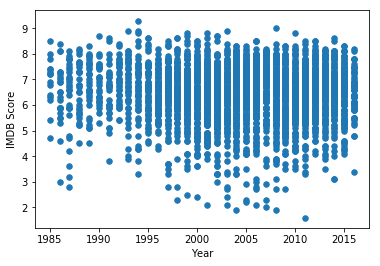

In [21]:
plt.scatter(x=mmdf['title_year'], y=mmdf['imdb_score'], s=30)
plt.xlabel('Year')
plt.ylabel('IMDB Score')

Text(0, 0.5, 'IMDB Score')

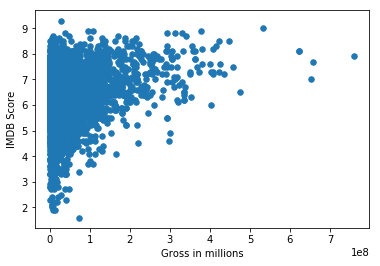

In [23]:
plt.scatter(x=mmdf['gross'], y=mmdf['imdb_score'], s=30)
plt.xlabel('Gross in millions')
plt.ylabel('IMDB Score')

Text(0, 0.5, 'Budget')

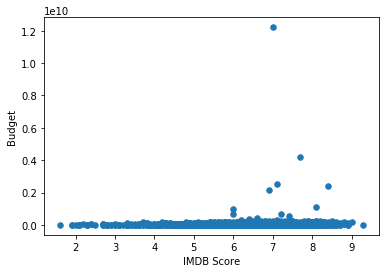

In [25]:
plt.scatter(x=mmdf['imdb_score'], y=mmdf['budget'], s=30)
plt.xlabel('IMDB Score')
plt.ylabel('Budget')

In [27]:
corr = mmdf.corr()
corr

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score,aspect_ratio
num_critic_for_reviews,1.000000,0.275326,0.475485,0.604745,0.561025,0.104016,0.532893,0.362614,0.179101
duration,0.275326,1.000000,0.274789,0.364820,0.383654,0.079996,-0.021058,0.363272,0.165811
gross,0.475485,0.274789,1.000000,0.633244,0.553780,0.102882,0.087398,0.211204,0.063506
num_voted_users,0.604745,0.364820,0.633244,1.000000,0.782039,0.070046,0.063266,0.477075,0.089497
num_user_for_reviews,0.561025,0.383654,0.553780,0.782039,1.000000,0.072087,0.029552,0.320226,0.098619
budget,0.104016,0.079996,0.102882,0.070046,0.072087,1.000000,0.033816,0.036325,0.023121
title_year,0.532893,-0.021058,0.087398,0.063266,0.029552,0.033816,1.000000,-0.027428,0.221045
imdb_score,0.362614,0.363272,0.211204,0.477075,0.320226,0.036325,-0.027428,1.000000,0.046709
aspect_ratio,0.179101,0.165811,0.063506,0.089497,0.098619,0.023121,0.221045,0.046709,1.000000
